<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D. TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.  Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

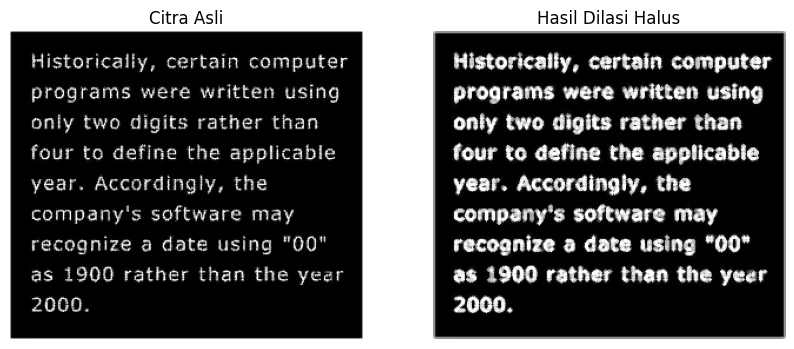

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan operasi dilasi yang lebih halus
def dilasi_halus(img, SE):
    # Ukuran SE
    se_h, se_w = SE.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Padding citra agar SE dapat diterapkan di semua area
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Buat citra output dengan ukuran yang sama
    dilated_img = np.copy(img)

    # Looping ke seluruh piksel citra
    for i in range(pad_h, padded_img.shape[0] - pad_h):
        for j in range(pad_w, padded_img.shape[1] - pad_w):
            region = padded_img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.any(SE * region):
                dilated_img[i - pad_h, j - pad_w] = np.max(region * SE)

    return dilated_img

# Membaca citra grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/morphology.png', cv2.IMREAD_GRAYSCALE)

# Structuring element berbentuk cross 3x3
SE = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]])

# Terapkan fungsi dilasi halus
dilated_image = dilasi_halus(img, SE)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Hasil Dilasi Halus')
plt.axis('off')

plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


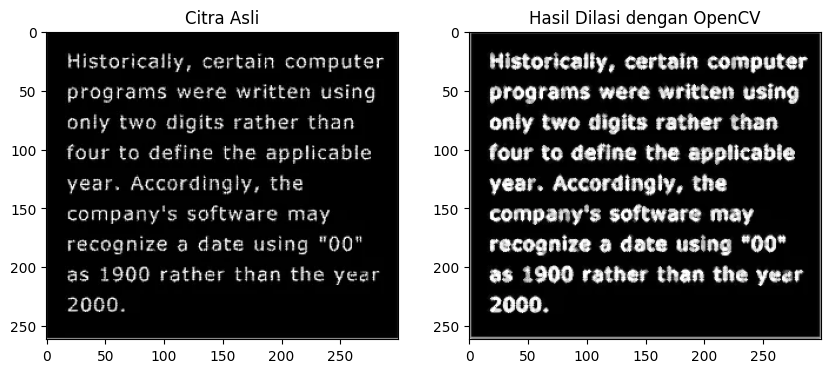

In [ ]:
struct_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Cetak structuring element
print("Structuring Element (Cross 3x3):")
print(struct_element)

# Dilasi menggunakan OpenCV
dilated_img_cv = cv2.dilate(img, struct_element)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_img_cv, cmap='gray')
plt.title('Hasil Dilasi dengan OpenCV')

plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

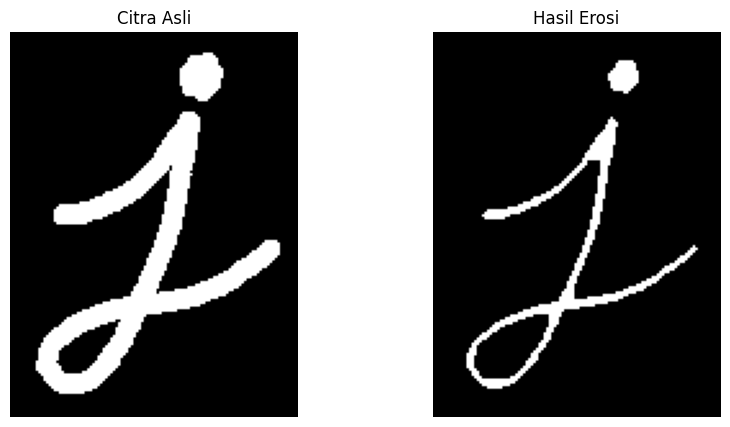

In [ ]:
def erosi(citra, se):
    # Mendapatkan ukuran citra dan ukuran SE
    citra_h, citra_w = citra.shape
    se_h, se_w = se.shape
    # Menghitung offset SE
    offset_h, offset_w = se_h // 2, se_w // 2
    # Membuat citra output
    output = np.zeros_like(citra)

    # Melakukan erosi
    for i in range(offset_h, citra_h - offset_h):
        for j in range(offset_w, citra_w - offset_w):
            # Mengambil area citra yang sesuai dengan SE
            region = citra[i - offset_h:i + offset_h + 1, j - offset_w:j + offset_w + 1]
            # Menggunakan operasi AND untuk semua nilai SE
            if np.all(region[se == 1] == 255):  # Mengecek semua elemen yang sesuai
                output[i, j] = 255

    return output

# Membaca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Menerapkan erosi
hasil_erosi = erosi(citra, se)

# Menampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(citra, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Erosi')
plt.imshow(hasil_erosi, cmap='gray')
plt.axis('off')

plt.show()


6. uatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

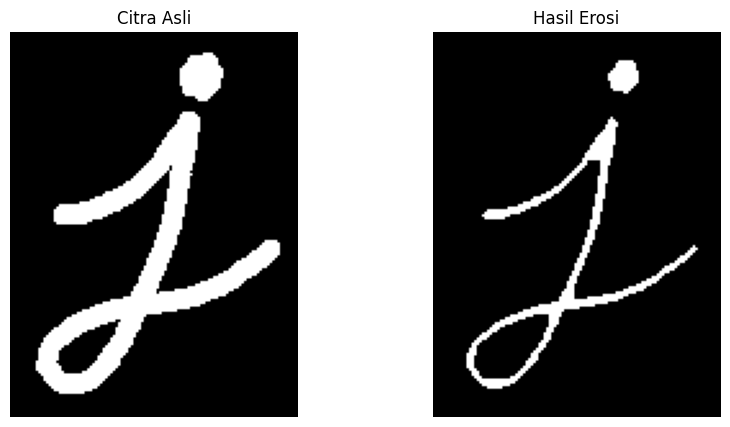

In [ ]:
# Membaca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Menerapkan erosi
hasil_erosi = cv2.erode(citra, se)

# Menampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(citra, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Erosi')
plt.imshow(hasil_erosi, cmap='gray')
plt.axis('off')

plt.show()



7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

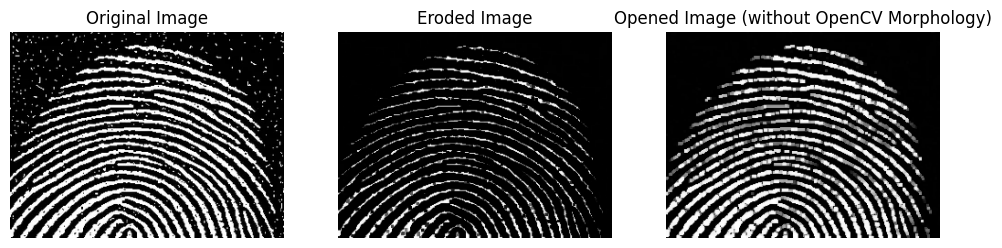

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define the structuring element (3x3 square)
kernel = np.ones((3, 3), np.uint8)

# Erosion
eroded_image = cv2.erode(image, kernel)

# Dilation
opened_image = cv2.dilate(eroded_image, kernel)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image (without OpenCV Morphology)')
plt.axis('off')

plt.show()


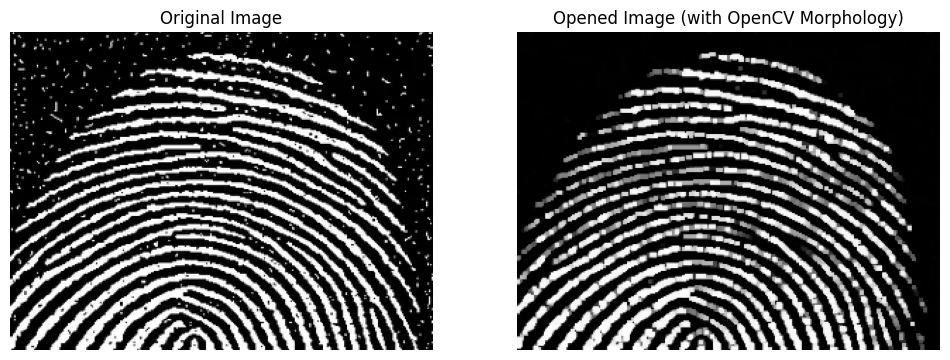

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define the structuring element (3x3 square)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Perform opening using morphologyEx
opened_image_morph = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened_image_morph, cmap='gray')
plt.title('Opened Image (with OpenCV Morphology)')
plt.axis('off')

plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)


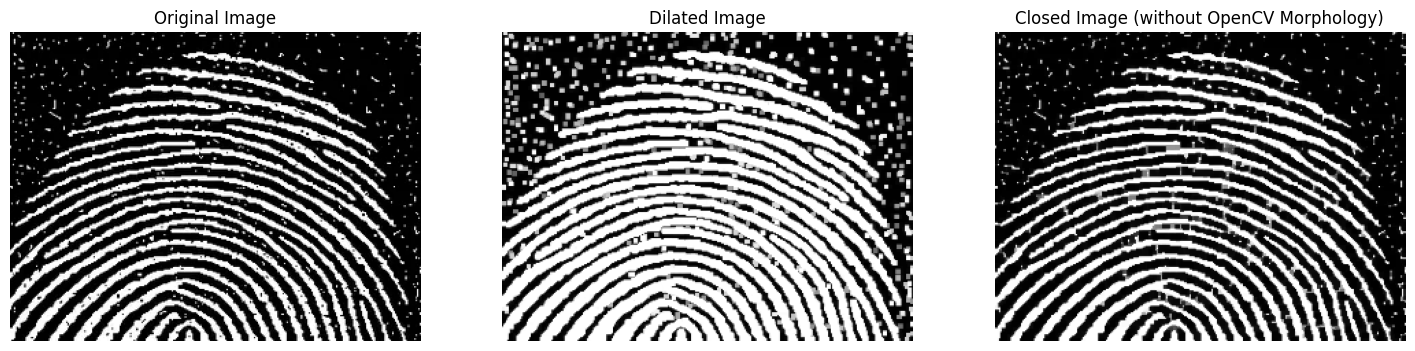

In [10]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define the structuring element (3x3 square)
kernel = np.ones((3, 3), np.uint8)

# --- Step 1: Perform Dilation ---
dilated_image = cv2.dilate(image, kernel)

# --- Step 2: Perform Erosion on the Dilated Image (Closing) ---
closed_image_no_morph = cv2.erode(dilated_image, kernel)

# Display the results
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Dilated Image
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Closed Image (without Morphology)
plt.subplot(1, 3, 3)
plt.imshow(closed_image_no_morph, cmap='gray')
plt.title('Closed Image (without OpenCV Morphology)')
plt.axis('off')

plt.show()


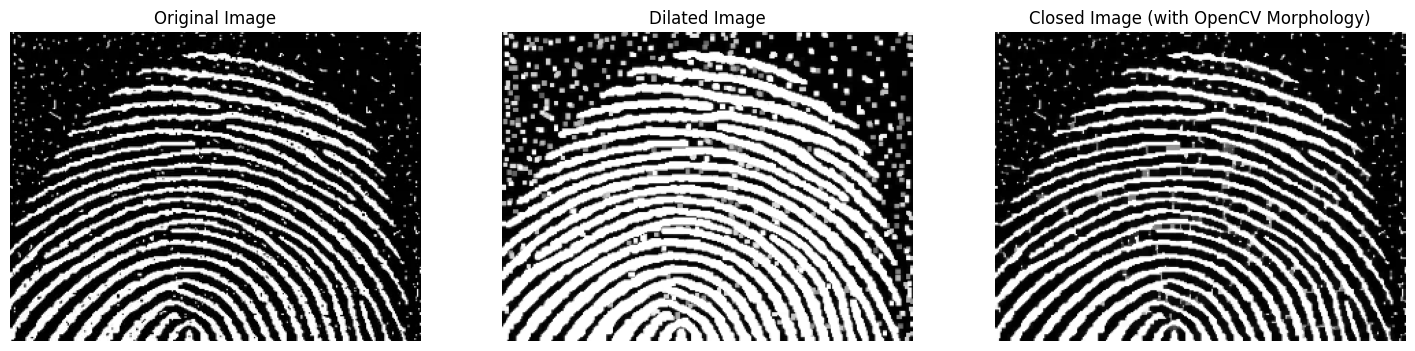

In [12]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Define the structuring element (3x3 square)
kernel = np.ones((3, 3), np.uint8)

# --- Step 1: Perform Dilation ---
dilated_image = cv2.dilate(image, kernel)

# --- Step 2: Perform Closing using OpenCV Morphology ---
closed_image_morph = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Dilated Image
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Closed Image (with Morphology)
plt.subplot(1, 3, 3)
plt.imshow(closed_image_morph, cmap='gray')
plt.title('Closed Image (with OpenCV Morphology)')
plt.axis('off')

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

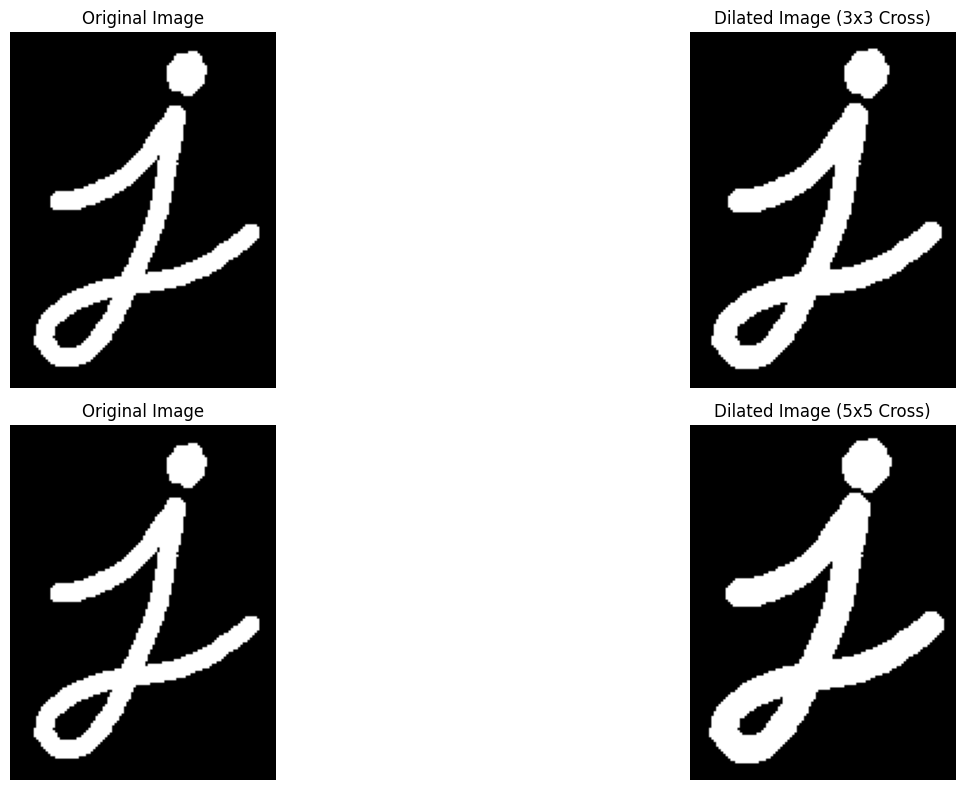

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png')

# Convert the original image to grayscale (if not already)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the structuring elements (3x3 and 5x5 cross)
kernel_3x3 = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

kernel_5x5 = np.array([[0, 0, 1, 0, 0],
                       [0, 0, 1, 0, 0],
                       [1, 1, 1, 1, 1],
                       [0, 0, 1, 0, 0],
                       [0, 0, 1, 0, 0]], dtype=np.uint8)

# Perform Dilation using the 3x3 cross kernel
dilated_image_3x3 = cv2.dilate(image_gray, kernel_3x3)

# Perform Dilation using the 5x5 cross kernel
dilated_image_5x5 = cv2.dilate(image_gray, kernel_5x5)

# Display the results
plt.figure(figsize=(18, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Dilated Image with 3x3 Cross
plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Dilated Image (3x3 Cross)')
plt.axis('off')

# Original image
plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Dilated Image with 5x5 Cross
plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Dilated Image (5x5 Cross)')
plt.axis('off')

plt.tight_layout()
plt.show()


10. uatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)


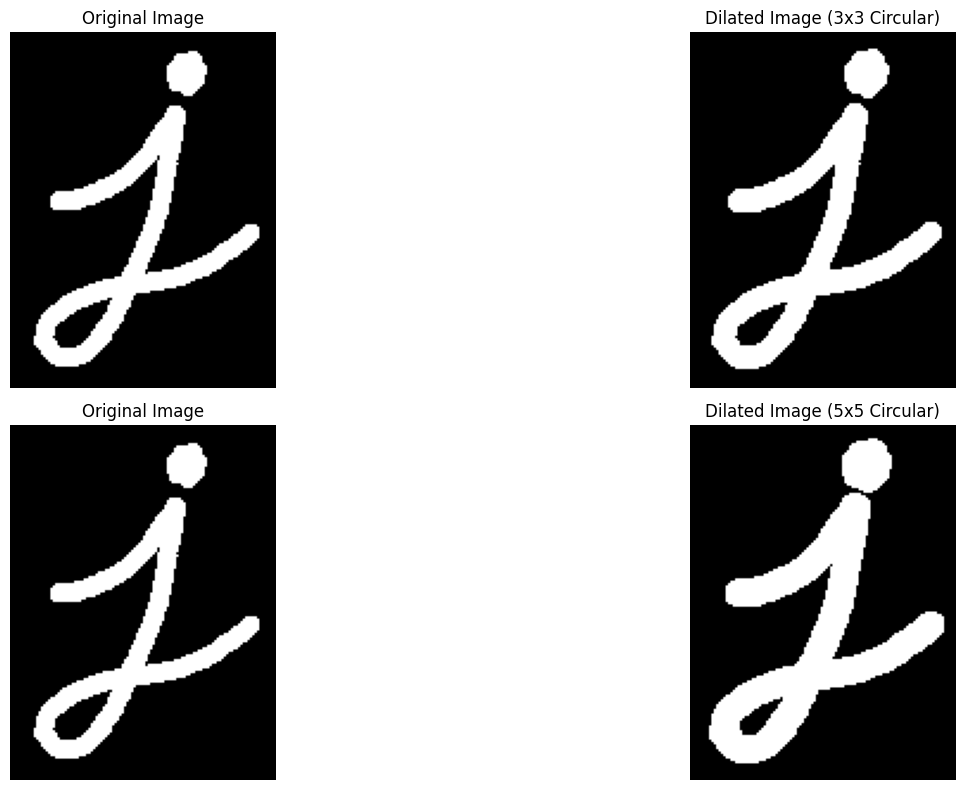

In [22]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png')

# Convert the original image to grayscale (if not already)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the structuring elements (3x3 and 5x5 circular)
kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Perform Dilation using the 3x3 circular kernel
dilated_image_3x3 = cv2.dilate(image_gray, kernel_3x3)

# Perform Dilation using the 5x5 circular kernel
dilated_image_5x5 = cv2.dilate(image_gray, kernel_5x5)

# Display the results
plt.figure(figsize=(18, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Dilated Image with 3x3 Circular
plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Dilated Image (3x3 Circular)')
plt.axis('off')

# Original image
plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Dilated Image with 5x5 Circular
plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Dilated Image (5x5 Circular)')
plt.axis('off')

plt.tight_layout()
plt.show()


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

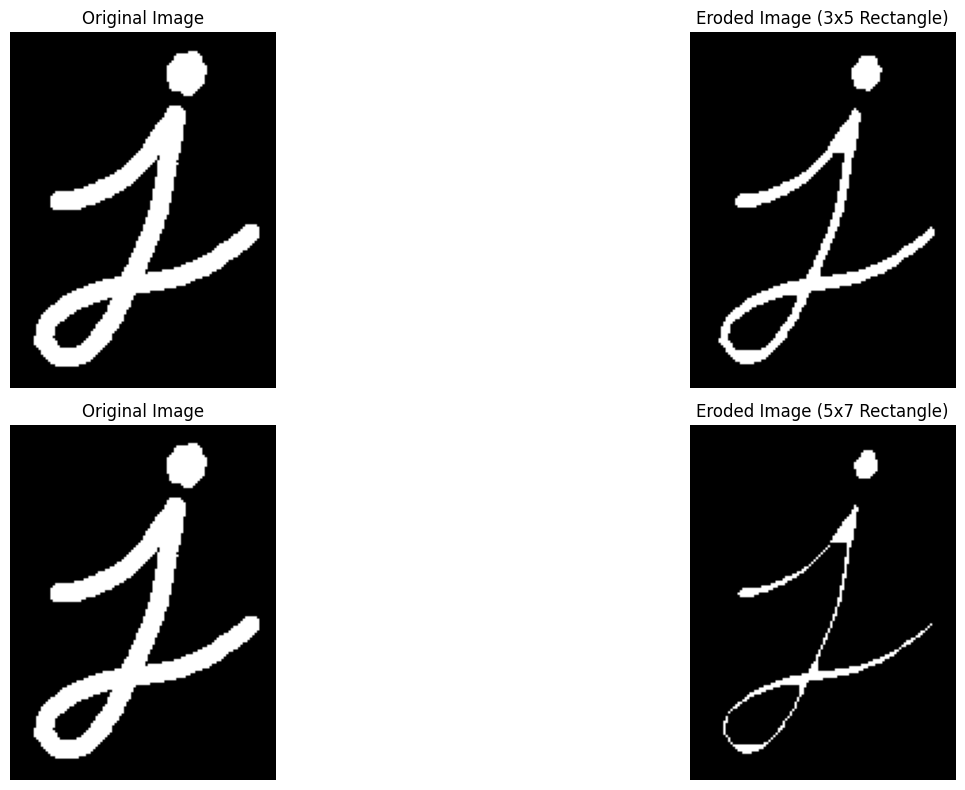

In [24]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png')

# Convert the original image to grayscale (if not already)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the structuring elements (3x5 and 5x7 rectangle)
kernel_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
kernel_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 5))

# Perform Erosion using the 3x5 rectangular kernel
eroded_image_3x5 = cv2.erode(image_gray, kernel_3x5)

# Perform Erosion using the 5x7 rectangular kernel
eroded_image_5x7 = cv2.erode(image_gray, kernel_5x7)

# Display the results
plt.figure(figsize=(18, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Eroded Image with 3x5 Rectangle
plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Eroded Image (3x5 Rectangle)')
plt.axis('off')

# Original image
plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Eroded Image with 5x7 Rectangle
plt.subplot(2, 2, 4)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Eroded Image (5x7 Rectangle)')
plt.axis('off')

plt.tight_layout()
plt.show()


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

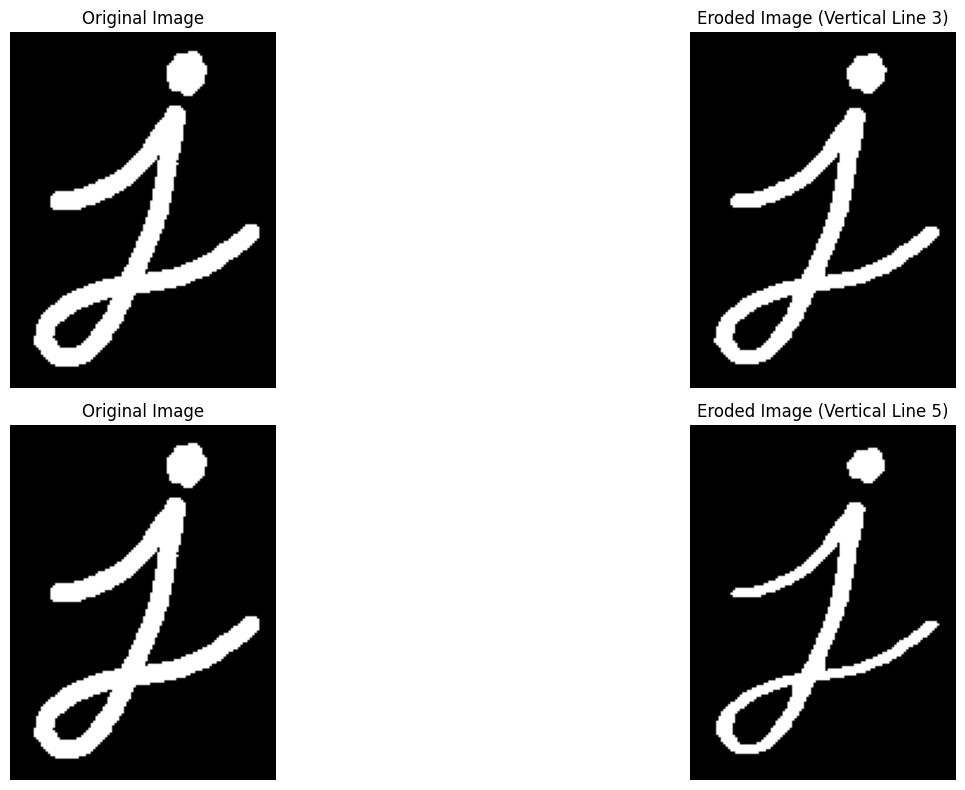

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png')

# Convert the original image to grayscale (if not already)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the structuring elements (Vertical Line of size 3 and 5)
kernel_vertical_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
kernel_vertical_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Perform Erosion using the 3-length vertical line kernel
eroded_image_vertical_3 = cv2.erode(image_gray, kernel_vertical_3)

# Perform Erosion using the 5-length vertical line kernel
eroded_image_vertical_5 = cv2.erode(image_gray, kernel_vertical_5)

# Display the results
plt.figure(figsize=(18, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Eroded Image with Vertical Line 3
plt.subplot(2, 2, 2)
plt.imshow(eroded_image_vertical_3, cmap='gray')
plt.title('Eroded Image (Vertical Line 3)')
plt.axis('off')

# Original image
plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Eroded Image with Vertical Line 5
plt.subplot(2, 2, 4)
plt.imshow(eroded_image_vertical_5, cmap='gray')
plt.title('Eroded Image (Vertical Line 5)')
plt.axis('off')

plt.tight_layout()
plt.show()
